In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
def QR(A, iters=5000, eps=1e-8):
    eig_vals_prev = np.zeros(A.shape[0])
    min_vals = np.array([])
    max_vals = np.array([])
    num_iter = np.array([])
    
    for i in range(iters):

        Q, R = np.linalg.qr(A)
        A = R @ Q
        eig_vals = np.diag(A)
        
        if np.linalg.norm(eig_vals_prev - eig_vals) <= eps:
            break
            
        eig_vals_prev = eig_vals
        
        min_vals = np.append(min_vals, np.min(eig_vals))
        max_vals = np.append(max_vals, np.max(eig_vals))
        num_iter = np.append(num_iter, i)
        
    return np.sort(eig_vals)[::-1], min_vals, max_vals, num_iter

In [167]:
N = 11
matrix = np.eye(N, k=0) * 6 + np.eye(N, k=1) * (-4) + np.eye(N, k=-1) * (-4) + np.eye(N, k=2) + np.eye(N, k=-2) 

my_eigvals, mins, maxs, iters = QR(matrix)
np_eigvals = np.linalg.eigvals(matrix)

In [169]:
np.sort(matrix)

array([[-4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.],
       [-4., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.],
       [-4., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  6.],
       [-4., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  6.],
       [-4., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  6.],
       [-4., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  6.],
       [-4., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  6.],
       [-4., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  6.],
       [-4., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  6.],
       [-4., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.],
       [-4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.]])

In [158]:
my_eigvals

array([15.48464251, 14.02164915, 11.84182724,  9.27310093,  6.67050598,
        4.34430484,  2.50381577,  1.22996536,  0.48157962,  0.13097974,
        0.01762886])

In [159]:
np_eigvals

array([15.48464254, 14.02164912, 11.84182724,  9.27310093,  6.67050598,
        4.34430484,  2.50381577,  1.22996536,  0.48157962,  0.13097974,
        0.01762886])

In [160]:
np.allclose(my_eigvals, np_eigvals)

True

Соответственно, функция `np.allclose` показала, что полученные значения с помощью `numpy` и с помощью `QR` схожи

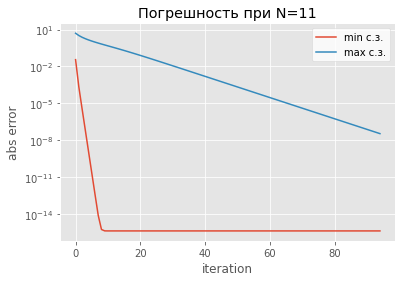

In [161]:
# Построим график при n=11

my_eigvals1, mins1, maxs1, iters1 = QR(matrix)
np_eigvals1 = np.linalg.eigvals(matrix)
true_min1 = np.min(np_eigvals1)
true_max1 = np.max(np_eigvals1)

plt.plot(iters1, np.abs(mins1 - true_min1), label='min с.з.')
plt.plot(iters1, np.abs(maxs1 - true_max1), label='max с.з.')
plt.yscale('log')
plt.ylabel('abs error')
plt.xlabel('iteration')
plt.title('Погрешность при N=11')
plt.legend(facecolor='white')
plt.show()

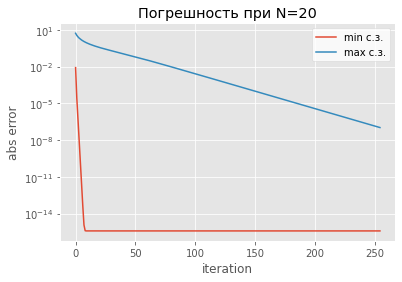

In [162]:
# Построим график при n=20

N = 20
matrix = np.eye(N, k=0) * 6 + np.eye(N, k=1) * (-4) + np.eye(N, k=-1) * (-4) + np.eye(N, k=2) + np.eye(N, k=-2) 

my_eigvals2, mins2, maxs2, iters2 = QR(matrix)
np_eigvals2 = np.linalg.eigvals(matrix)
true_min2 = np.min(np_eigvals2)
true_max2 = np.max(np_eigvals2)

plt.plot(iters2, np.abs(mins2 - true_min2), label='min с.з.')
plt.plot(iters2, np.abs(maxs2 - true_max2), label='max с.з.')
plt.yscale('log')
plt.ylabel('abs error')
plt.xlabel('iteration')
plt.title('Погрешность при N=20')
plt.legend(facecolor='white')
plt.show()

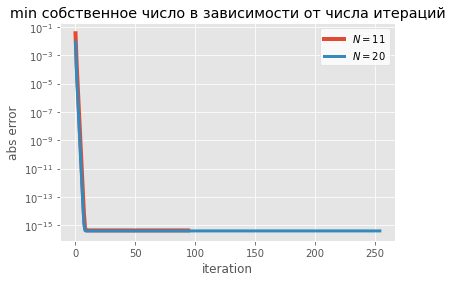

In [163]:
plt.plot(iters1, np.abs(mins1 - true_min1), label='$N=11$', linewidth=4)
plt.plot(iters2, np.abs(mins2 - true_min2), label='$N=20$', linewidth=3)
plt.yscale('log')
plt.ylabel('abs error')
plt.xlabel('iteration')
plt.title('min собственное число в зависимости от числа итераций')
plt.legend(facecolor='white')
plt.show()

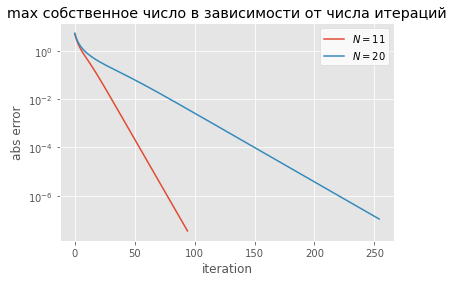

In [165]:
plt.plot(iters1, np.abs(maxs1 - true_max1), label='$N=11$')
plt.plot(iters2, np.abs(maxs2 - true_max2), label='$N=20$')
plt.yscale('log')
plt.ylabel('abs error')
plt.xlabel('iteration')
plt.title('max собственное число в зависимости от числа итераций')
plt.legend(facecolor='white')
plt.show()

При $N=20$ сходимость происходит за большее количество итераций

In [171]:
matrix = [np.array([4,6,3]), np.array([1,5,2])]
np.sort(matrix)

array([[3, 4, 6],
       [1, 2, 5]])